In [1]:
import numpy as np

# y = np.load('/scratch/lllei/inf1050_loc240/train/elf/distance_only/debug_481/inc_t.npy')
# x = np.load('/scratch/lllei/inf1050_loc240/train/elf/distance_only/debug_481/inc_p.npy')

# print('inc_t shape:', y.shape)
# print('inc_p shape:', x.shape)

In [3]:
a = np.load('reg_loc_beta.npy')
# var_y = np.sum((y-a*x)**2)/(x.shape[0]-2)
# std_a = (var_y / np.sum(x**2, axis=0)) ** 0.5 

# z_value = (a-0) / std_a

# ztest = abs(z_value) >= 1.282

# a_ztest = np.array([a[i] if (ztest[i]==True) and (i<200) else 0 for i in range(len(a))])
# a_ztest = np.array([a[i] if i<490 else 0 for i in range(len(a))])


<IPython.core.display.Javascript object>


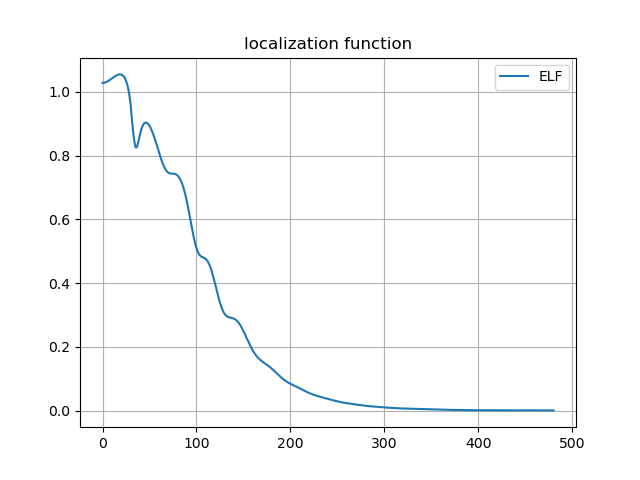

In [4]:
%matplotlib notebook
import sys
sys.path.append('/Users/ree/Documents/DataAssimilization/AI_localization/L05/git_repo/general')
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt

model_size = 960
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
loc_size = int(model_size/2)+1


elf = np.load('reg_loc_beta.npy')
# elf_ztest = np.load('elf_ztest.npy')

plt.plot(range(loc_size), elf, label='ELF')
# plt.plot(range(loc_size), elf_ztest, label='ELF_ztest')
plt.title('localization function')
plt.legend()
plt.grid(True)
plt.show()

## smoothing splines

<IPython.core.display.Javascript object>


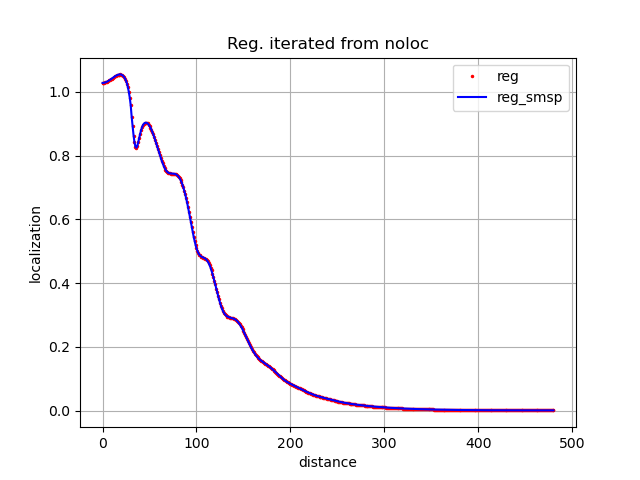

In [7]:
%matplotlib notebook
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt


elf_ztest = np.load('reg_loc_beta.npy')
# elf_mva7 = np.load('elf_mva.npy')

loc_size=481
fitrange = 481
x = np.array(range(fitrange))
y = elf_ztest[:fitrange]

spl = UnivariateSpline(x, y,s=0.00003)
y_smsp = spl(x)

elf_smsp = np.concatenate((y_smsp, elf_ztest[fitrange:]),axis=0)
xs = np.array(range(loc_size))
plt.plot(xs, elf_ztest, 'ro', ms=1.5, label='reg')
plt.plot(xs, elf_smsp, 'b', lw=1.5, label='reg_smsp')
# plt.plot(xs, elf_mva7, color='yellow',label='ELF_mva7')
plt.grid(True)
plt.title('Reg. iterated from noloc')
plt.legend()
plt.xlabel('distance')
plt.ylabel('localization')
plt.show()
plt.savefig('reg_smsp.png')

In [8]:
np.save('reg_smsp.npy', elf_smsp)

<IPython.core.display.Javascript object>


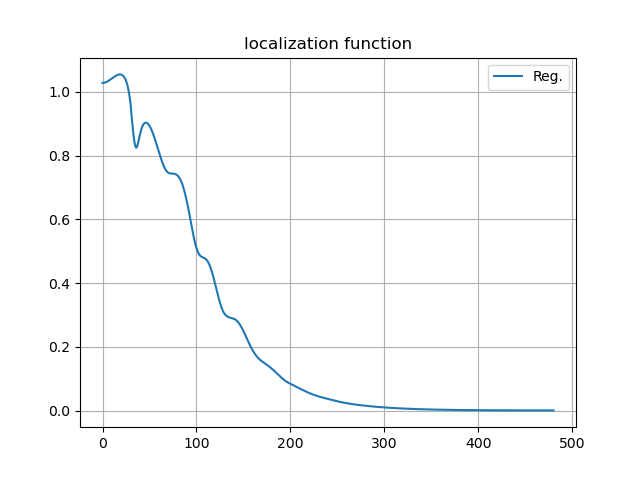

In [9]:
%matplotlib notebook
import sys
sys.path.append('/Users/ree/Documents/DataAssimilization/AI_localization/L05/git_repo/general')
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt

model_size = 960
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
loc_size = int(model_size/2)+1


elf = np.load('reg_smsp.npy')
# elf_ztest = np.load('elf_ztest.npy')

plt.plot(range(loc_size), elf, label='Reg.')
# plt.plot(range(loc_size), elf_ztest, label='ELF_ztest')
plt.title('localization function')
plt.legend()
plt.grid(True)
plt.show()